In [1]:
from PIL import Image as PILImage
from img2table.document import Image
from img2table.ocr import TesseractOCR
from img2table.tables.processing.common import get_contours_cell, is_contained_cell, merge_contours
from img2table.tables.processing.lines import detect_lines
from img2table.tables.objects.cell import Cell
from colordict import ColorDict
import cv2
import numpy as np

In [2]:
import random
colors = ColorDict()

def get_color():
    idx = random.randint(0, len(colors) - 1)
    return list(colors.values())[idx]

### Loading image

In [10]:
img = Image(r"C:\Users\xavca\Pictures\test_6.png")
ocr = TesseractOCR()
ocr_df = ocr.of(img)
dpi = 200

img = list(img.images)[0]

### Word image

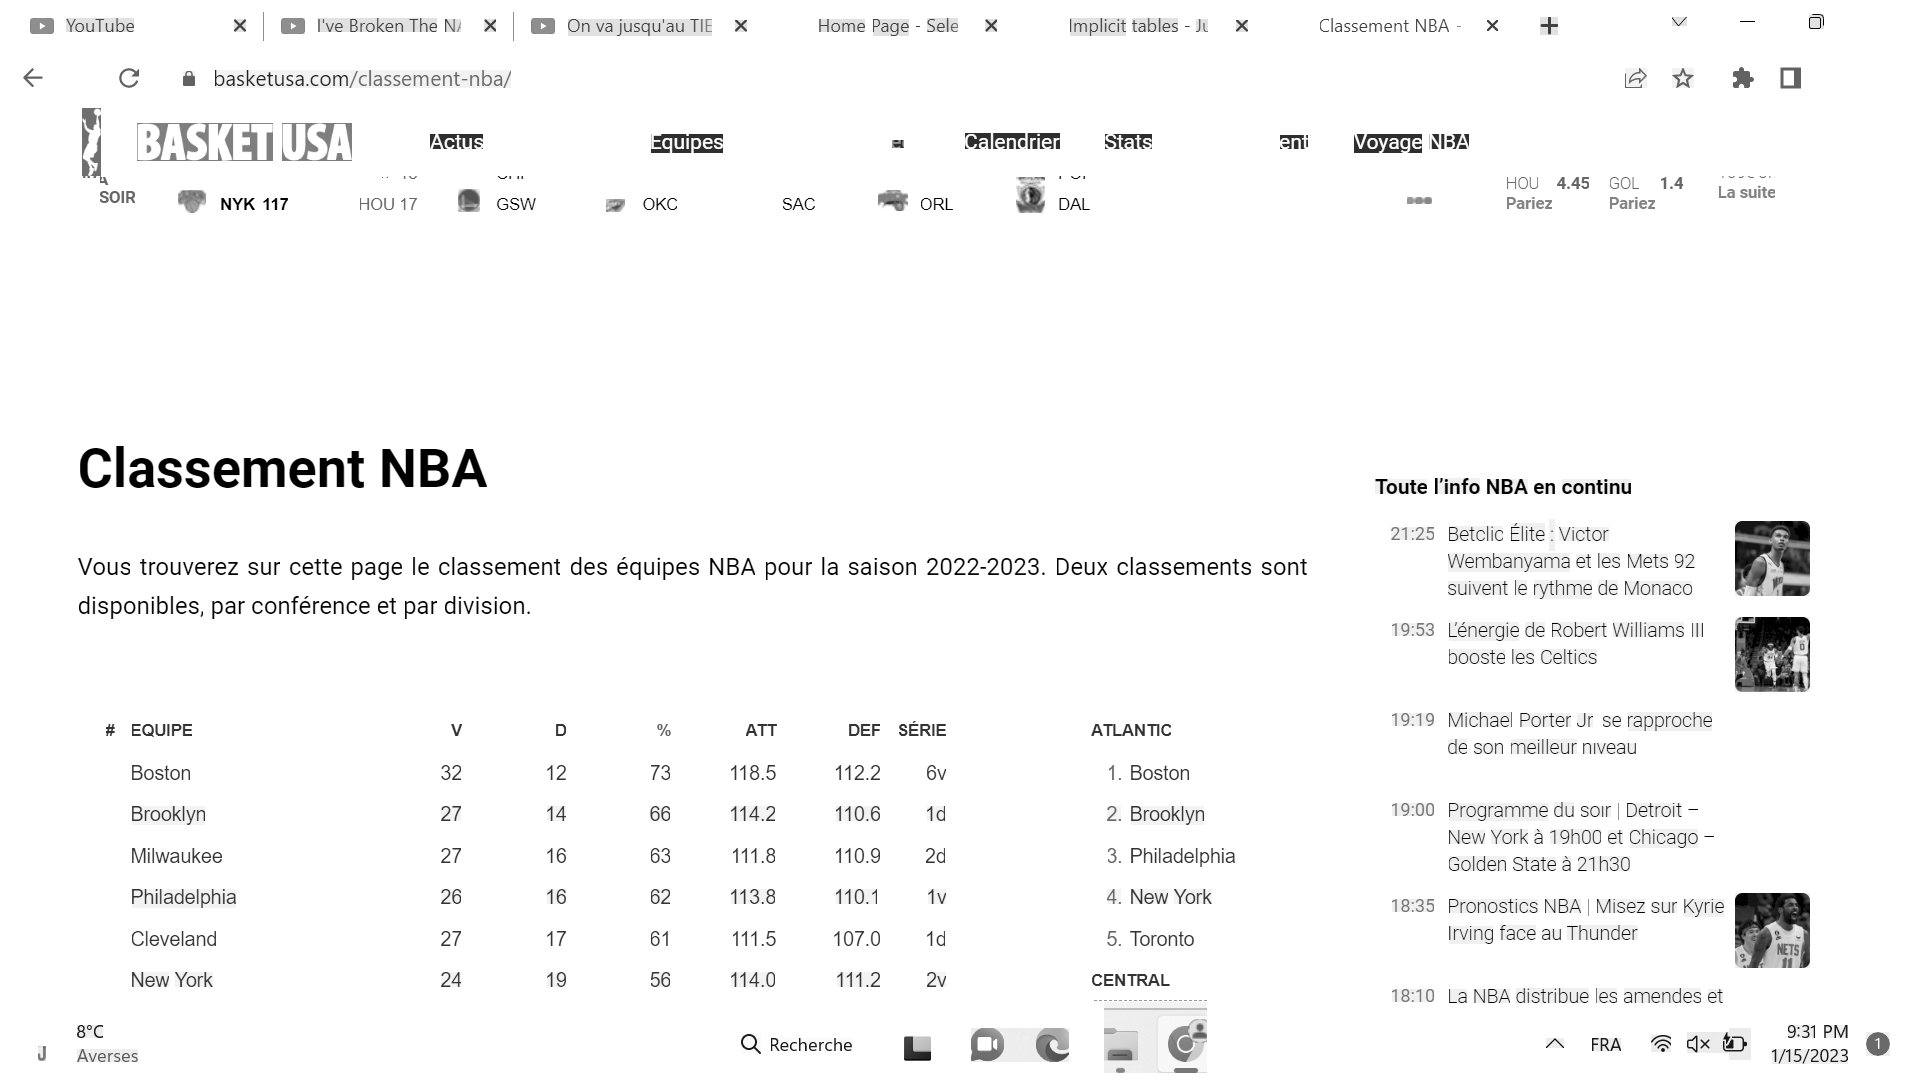

In [11]:
from img2table.tables.processing.tables.implicit_rows import create_word_image

word_image = create_word_image(img=img, ocr_df=ocr_df, min_confidence=20)

PILImage.fromarray(word_image)

### Text segmentation

In [12]:
from img2table.tables.processing.borderless_tables.segment_image import segment_image_text

img_segments = segment_image_text(img=img, ocr_df=ocr_df)

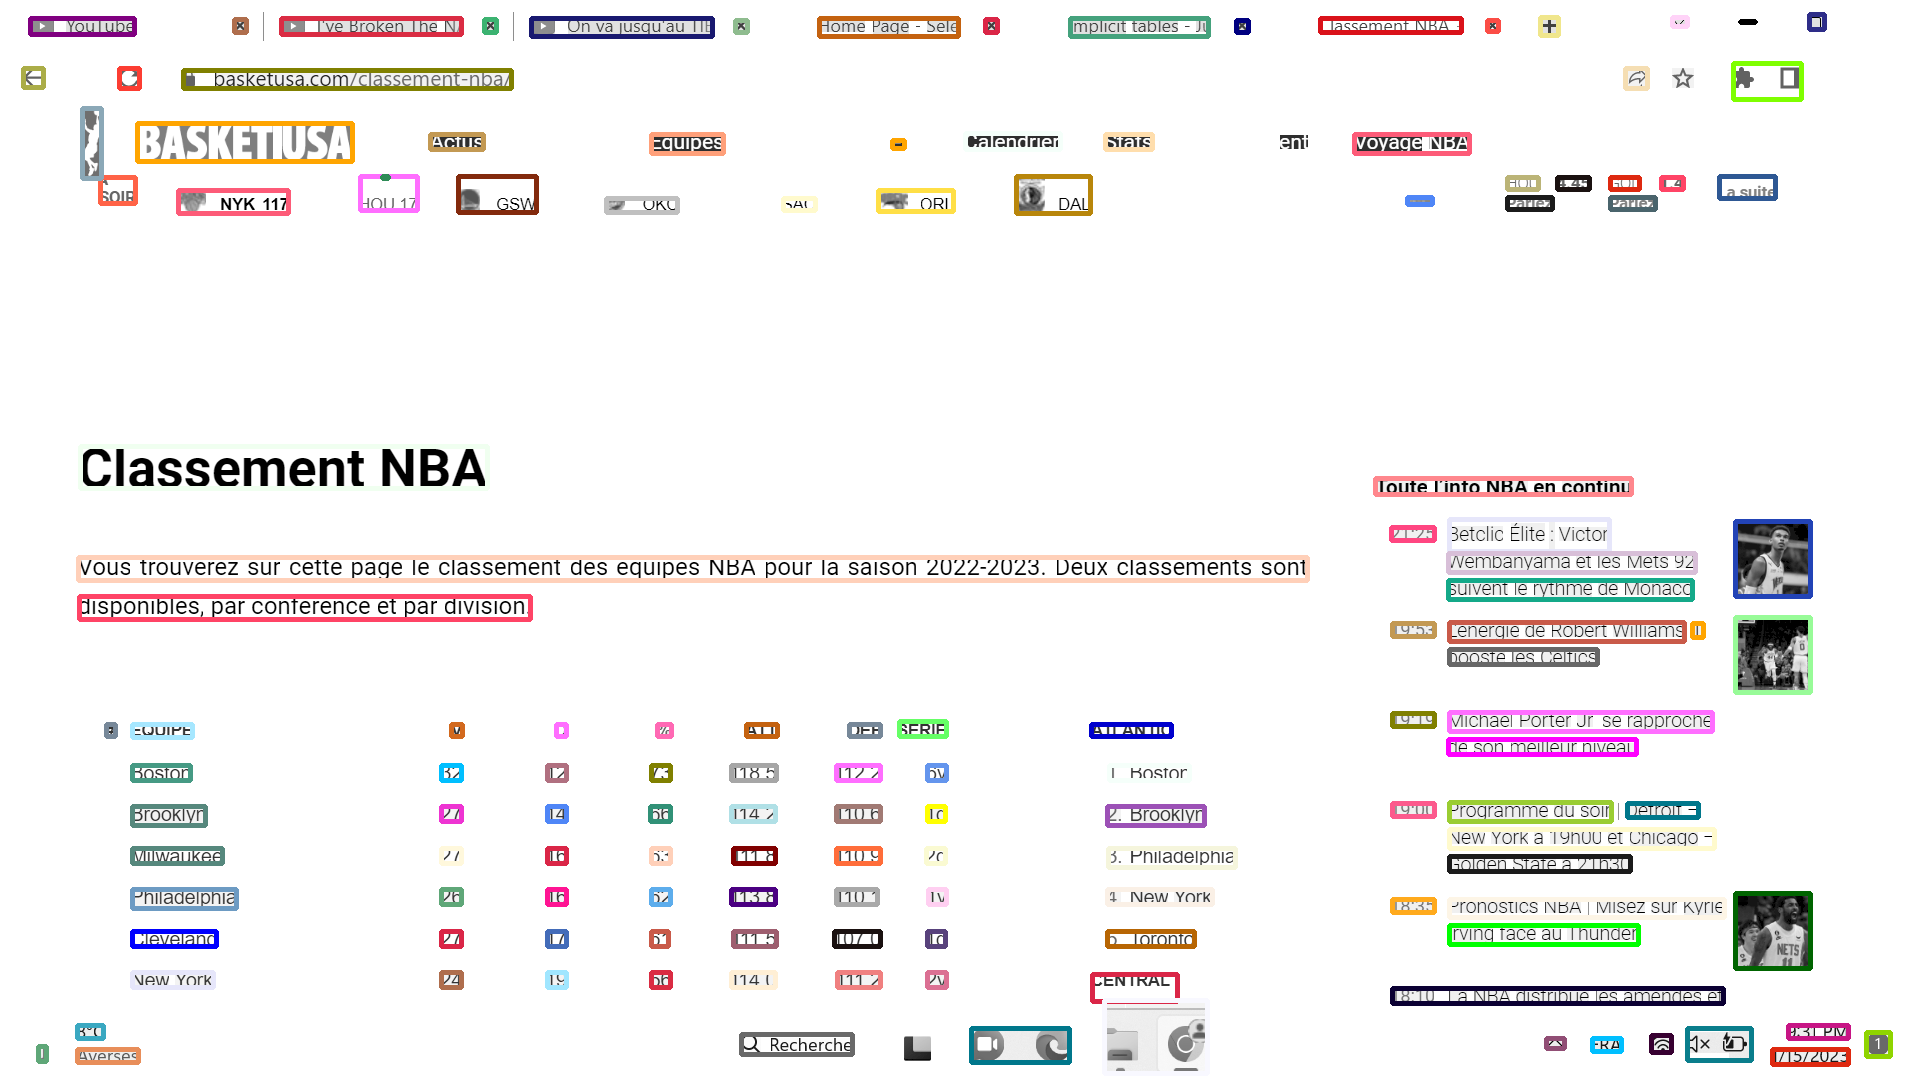

In [13]:
display_img = cv2.cvtColor(word_image.copy(), cv2.COLOR_GRAY2RGB)

for segment in img_segments:
    for cnt in segment:
        cv2.rectangle(display_img, (cnt.x1, cnt.y1), (cnt.x2, cnt.y2), get_color(), 3)
PILImage.fromarray(display_img)

### Manual clustering

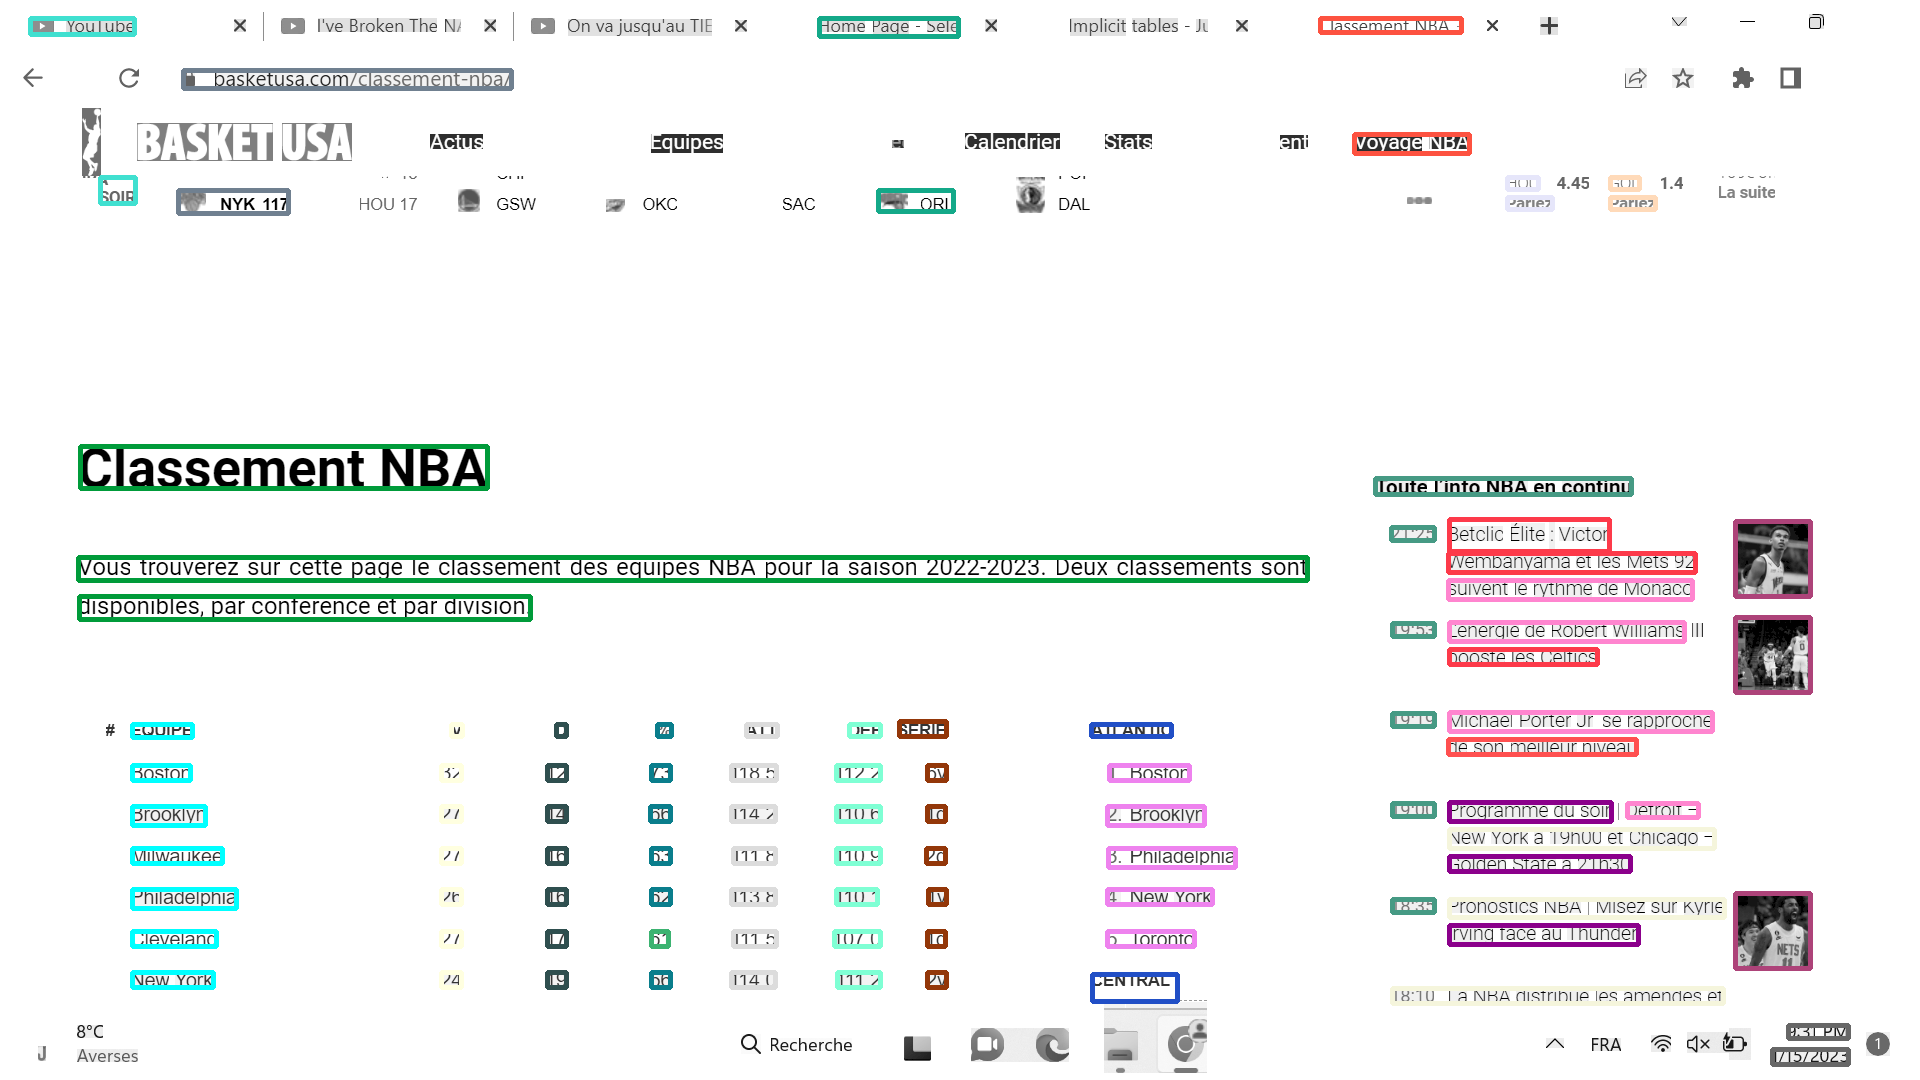

In [14]:
from img2table.tables.processing.borderless_tables.alignment import cluster_aligned_text

display_img = cv2.cvtColor(word_image.copy(), cv2.COLOR_GRAY2RGB)


segments_clusters = [cluster_aligned_text(segment) for segment in img_segments if segment]

for seg_clust in segments_clusters:
    for clust in seg_clust:
        color = get_color()
        for cnt in clust:
            cv2.rectangle(display_img, (cnt.x1, cnt.y1), (cnt.x2, cnt.y2), color, 3)

PILImage.fromarray(display_img)

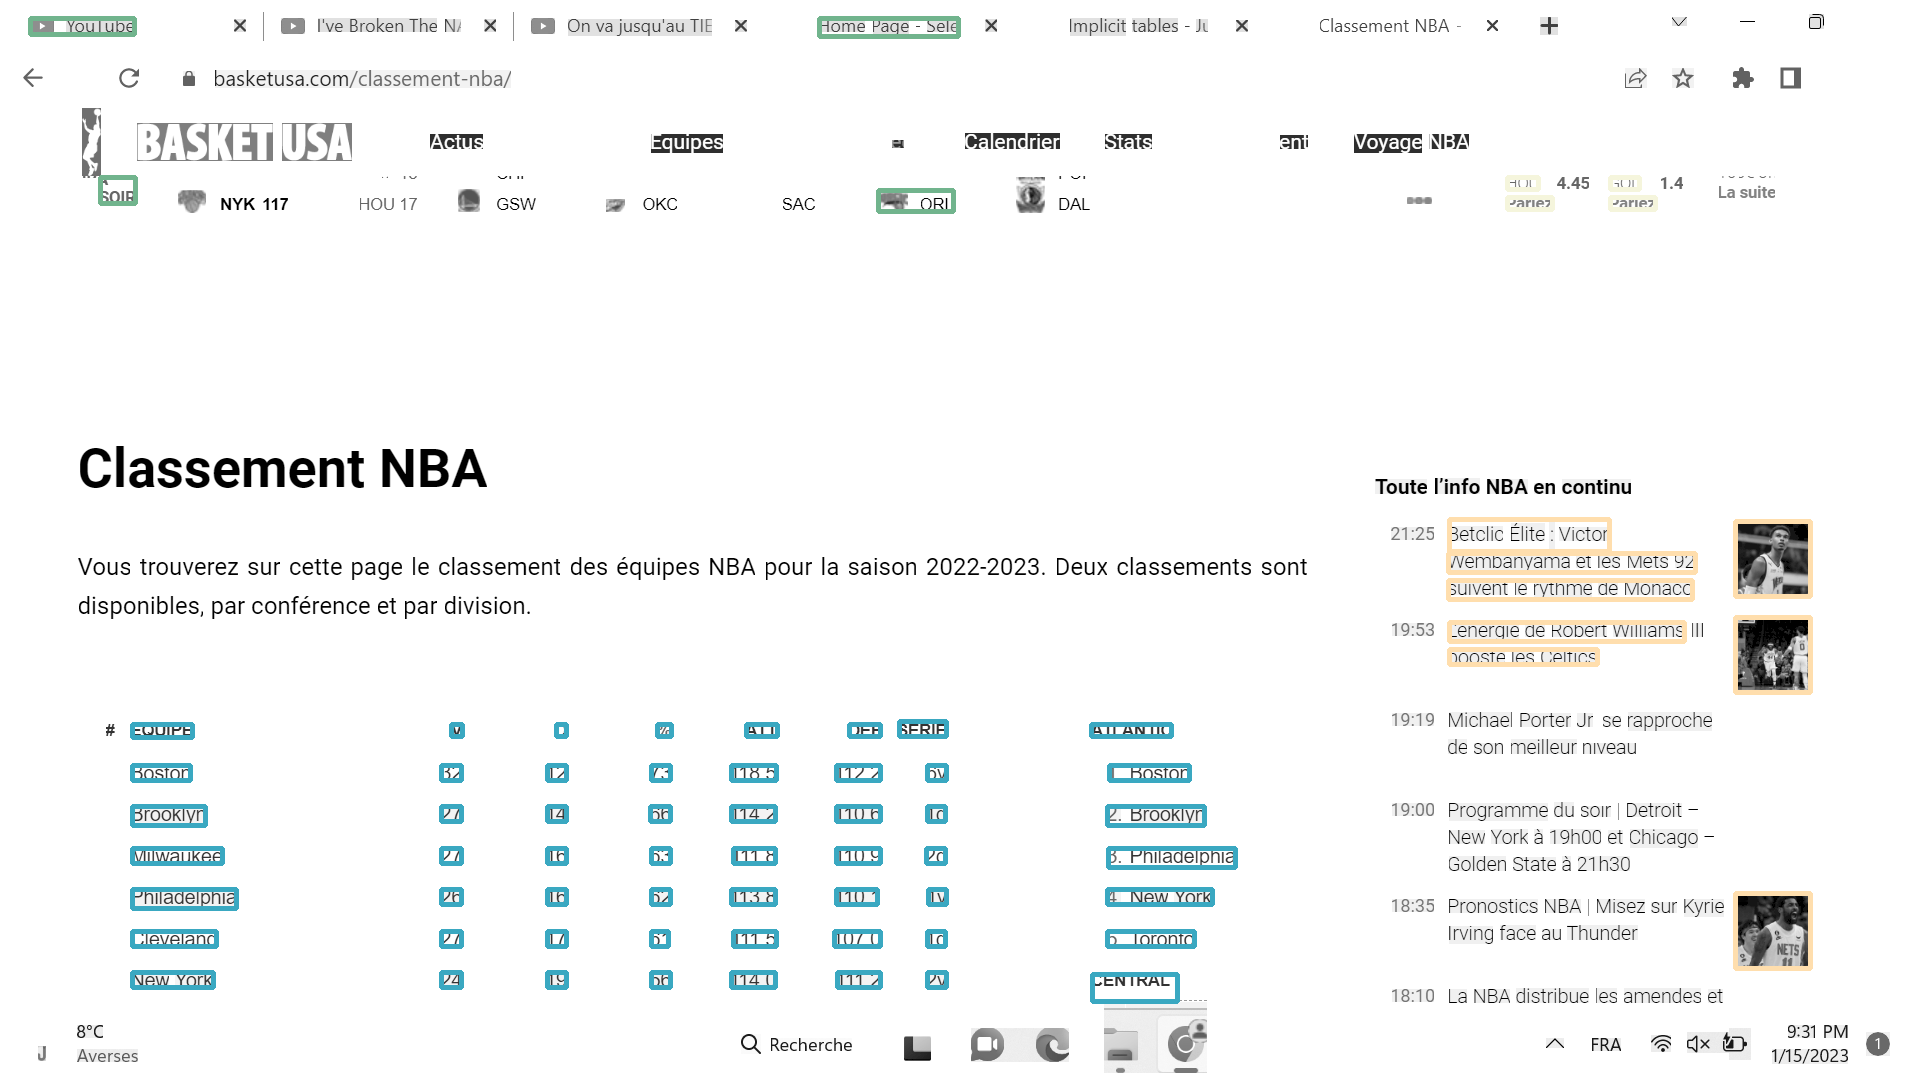

In [15]:
from img2table.tables.processing.borderless_tables.identify_tables import identify_tables
display_img = cv2.cvtColor(word_image.copy(), cv2.COLOR_GRAY2RGB)

potential_tables = [identify_tables(clusters=segment) for segment in segments_clusters]

for cycles in potential_tables:
    for cycle in cycles:
        color = get_color()
        for clust in cycle:
            for cnt in clust:
                cv2.rectangle(display_img, (cnt.x1, cnt.y1), (cnt.x2, cnt.y2), color, 3)

PILImage.fromarray(display_img)